In [64]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



from sklearn.cluster import KMeans


In [66]:
data=pd.read_csv('Mall_Customers.csv')

In [67]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [71]:
X=data.drop(columns=['CustomerID','Gender','Age'], axis=1).values

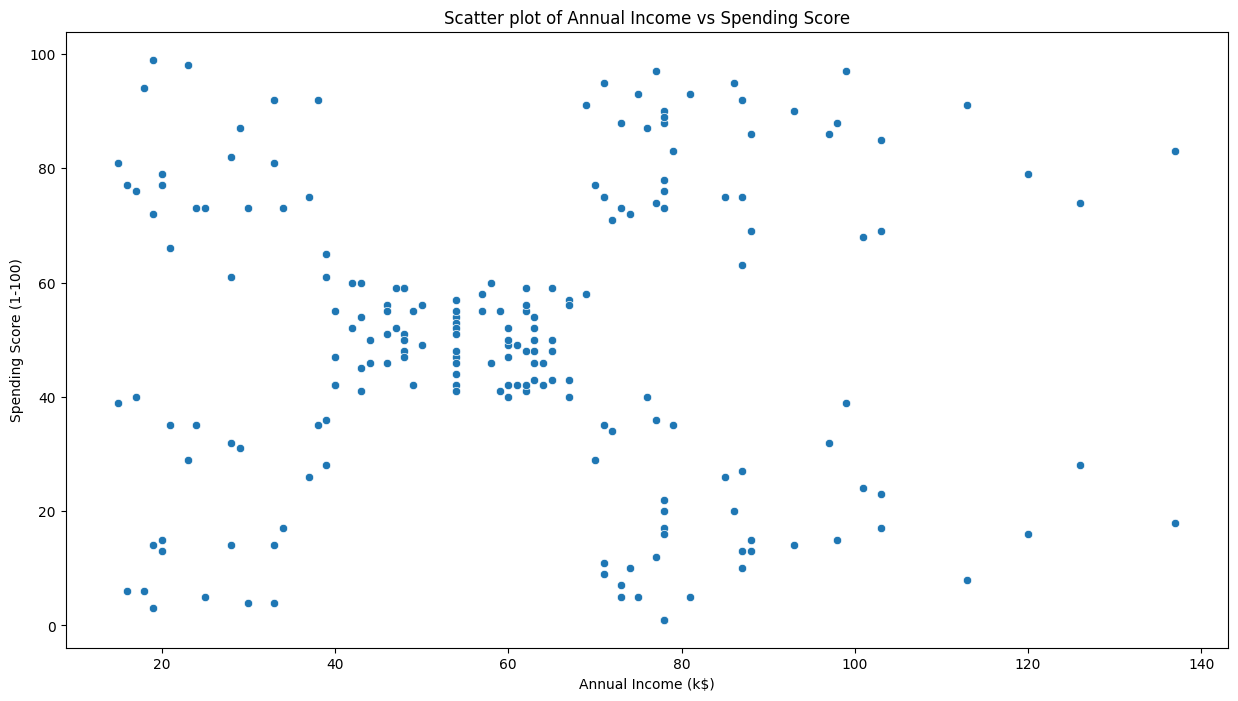

In [73]:
plt.figure(figsize=(15, 8))  # Set the size of the plot
sns.scatterplot(x=X[:,0], y=X[:,1])  # Create a scatter plot
plt.xlabel('Annual Income (k$)')  # Set the label for the x-axis
plt.ylabel('Spending Score (1-100)')  # Set the label for the y-axis
plt.title('Scatter plot of Annual Income vs Spending Score')  # Optionally add a title to the plot
plt.show() 

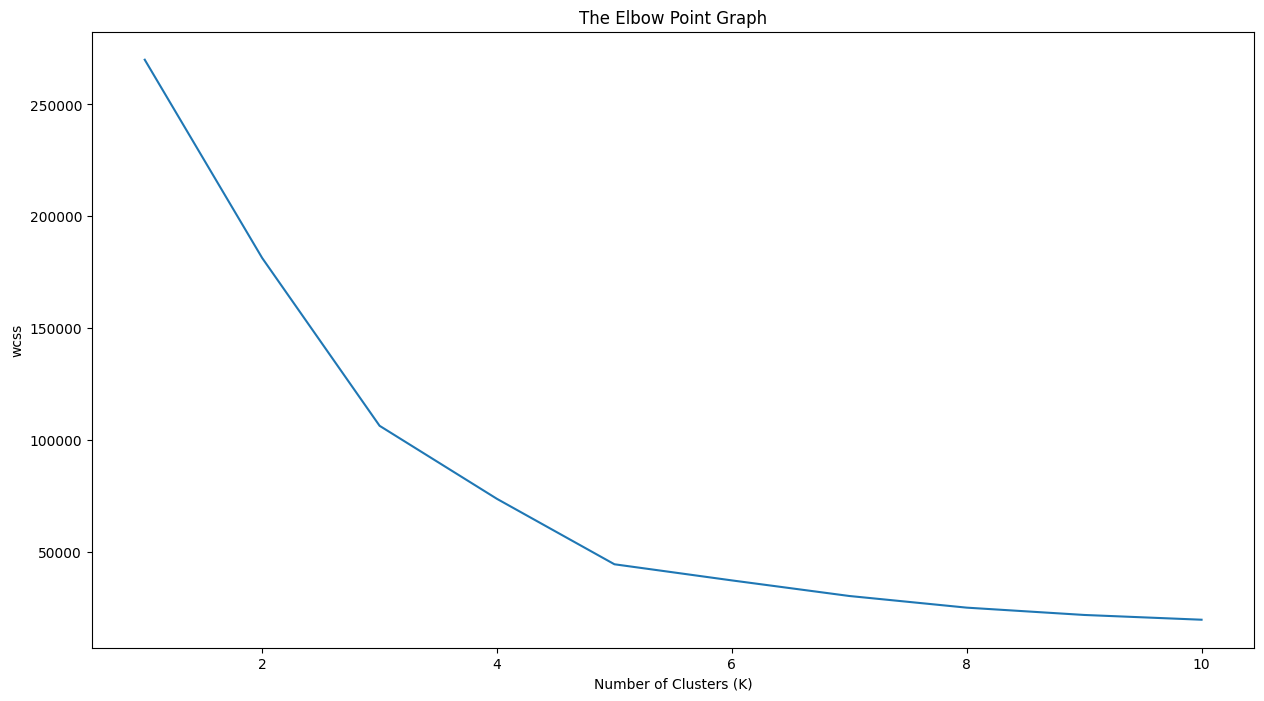

In [75]:
 wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()



In [76]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y=kmeans.fit_predict(X)

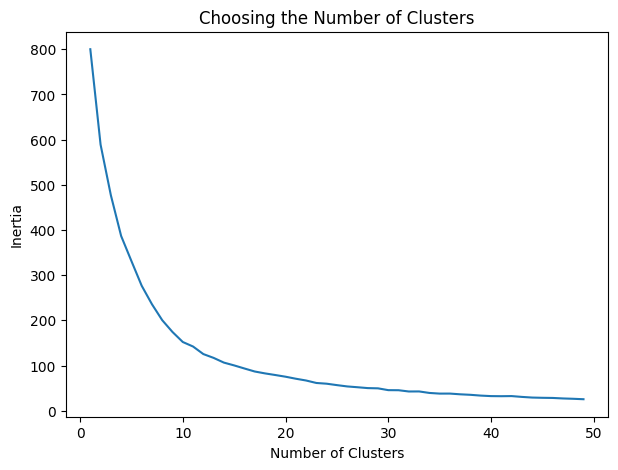

In [54]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Choosing the Number of Clusters")
plt.show()

In [55]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10, n_init=10)

In [77]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

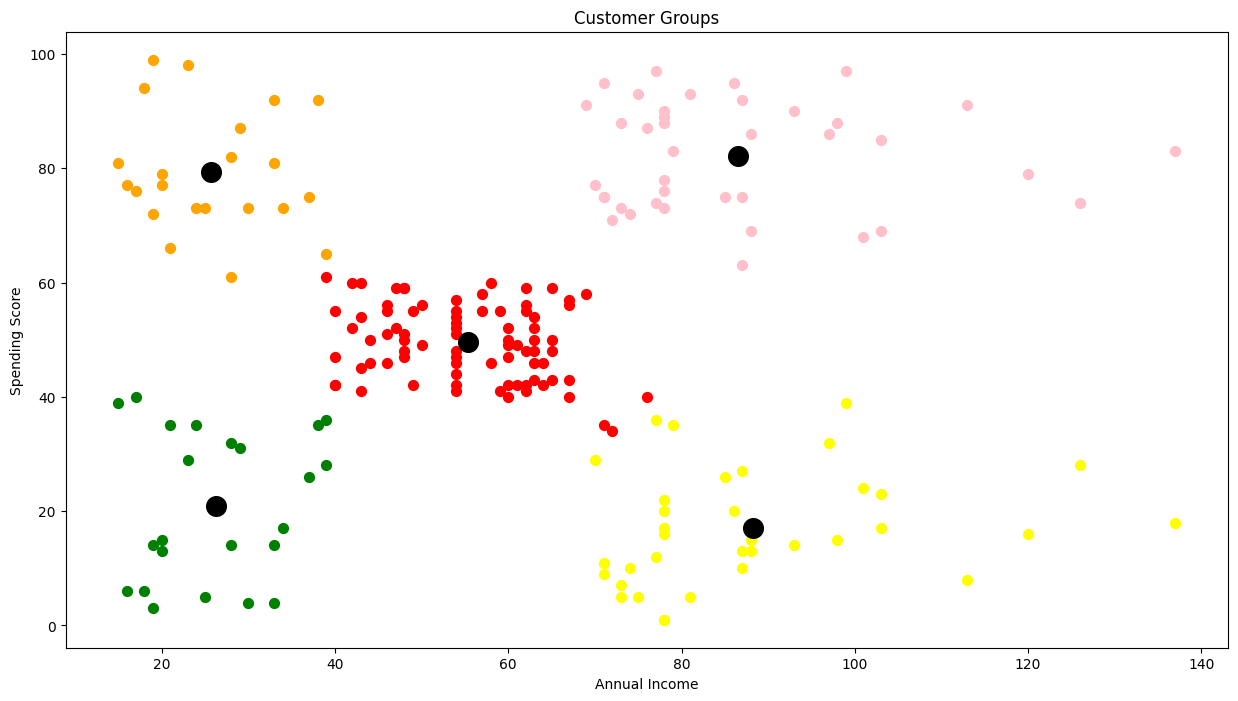

In [80]:
plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label ='Cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label ='Cluster2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label ='Cluster3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label ='Cluster4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label ='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200,c='black')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()